# Identitas Kelompok
Nomor Kelompok: 5

Nama Kelompok: Lima-B-Aja

Ketua Kelompok: Fajar Arahman

Anggota kelompok:
1. Yusuf Rifqi H
2. M Zamzam I
3. Sahel Abdat
4. Putrini Nur A H
5. Surya Karunia R
6. M Rendra Putra P
Pilihan Dataset: E-commerce Churn Rate

# Import Library & Load Dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)

1.3.5
1.21.5
3.2.2
0.11.2


In [41]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
df = pd.read_excel('dataset/e_commerce.xlsx', sheet_name=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Descriptive Statistics

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [33]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


WarehouseToHome
Tenure
HourSpendOnApp
OrderAmountHikeFromlastYear
CouponUsed
OrderCount
DaySinceLastOrder

In [27]:
df.PreferredLoginDevice.unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [28]:
df.PreferredPaymentMode.unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [29]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [30]:
df.PreferedOrderCat.unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [31]:
df.MaritalStatus.unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [37]:
df.duplicated().sum()

0

Analisa: 
* Tidak ada duplikat pada dataset

# Hasil Analisa


A Sudah sesuai

B : Terdapat missing value untuk column
WarehouseToHome,
Tenure,
HourSpendOnApp,
OrderAmountHikeFromlastYear,
CouponUsed,
OrderCount,
DaySinceLastOrder,


C : Tidak ada

In [59]:
cats =['PreferredLoginDevice', 
                 'PreferredPaymentMode',
                 'Gender',
                 'PreferedOrderCat',
                 'MaritalStatus']

nums = ['CustomerID', 
              'Tenure', 
              'CityTier', 
              'WarehouseToHome', 
              'HourSpendOnApp', 
              'NumberOfDeviceRegistered', 
              'SatisfactionScore', 
              'NumberOfAddress', 
              'Complain', 
              'OrderAmountHikeFromlastYear',
              'CouponUsed', 
              'OrderCount', 
              'DaySinceLastOrder', 
              'CashbackAmount', 
              'Churn']

In [60]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print('\n')

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64


Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [61]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

# Hasil Analisa
* Kolom Tenure Kosong 264 Data
* Kolom Warehouse To Home Kosong 251 Data
* Kolom HourSpendOnApp Kosong 255 Data
* Kolom OrderAmountHikeFromlastYear 265 Data
* Kolom CouponUsed 256 Data
* Kolom OrderCount 258 Data
* Kolom DaySinceLastOrder 307 Data

# Univarate Analysis

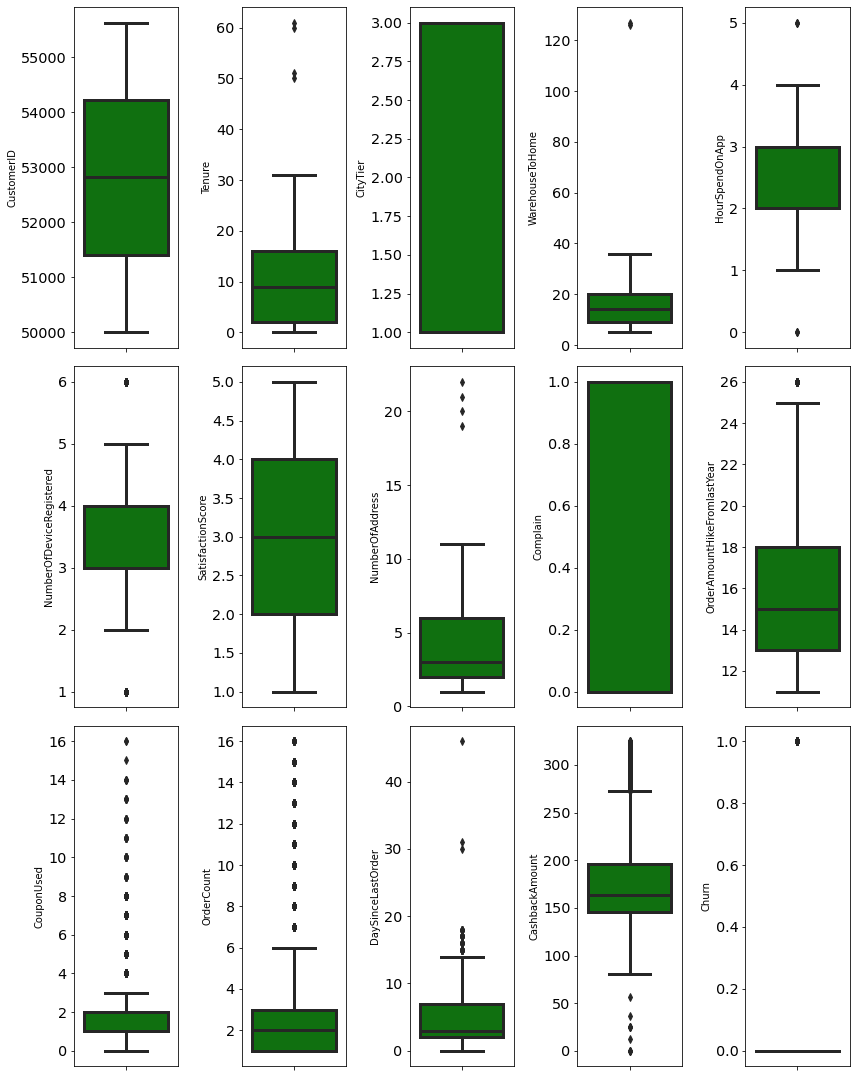

In [62]:
plt.figure(figsize=(12, 20))
for i in range(0, len(nums)):
    plt.subplot(4, len(nums)/3, i+1)
    sns.boxplot(y=df[nums[i]], color='green', orient='v')
    plt.tight_layout()

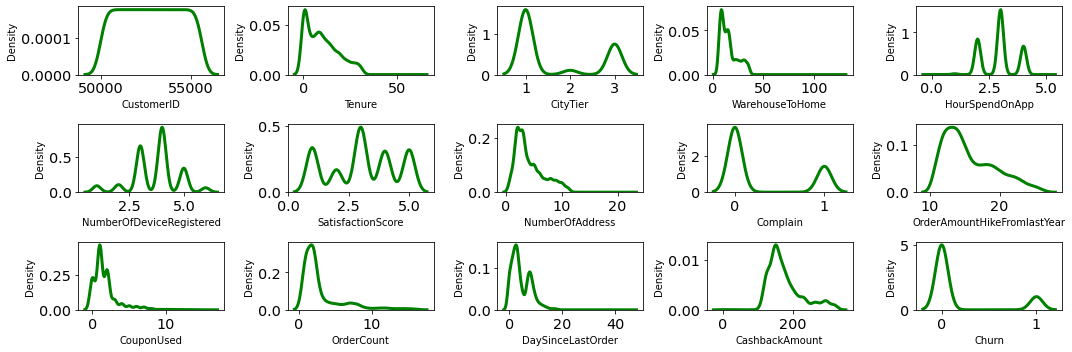

In [63]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.kdeplot(x=df[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

Analisa : 
* Dengan boxplot, semua data numerikal memiliki outlier
* Kebanyakan data pada seitap positive skew
* Target feature (churn) memiliki sebaran yang timpang , dengan demikian dataset mengalami imbalance data

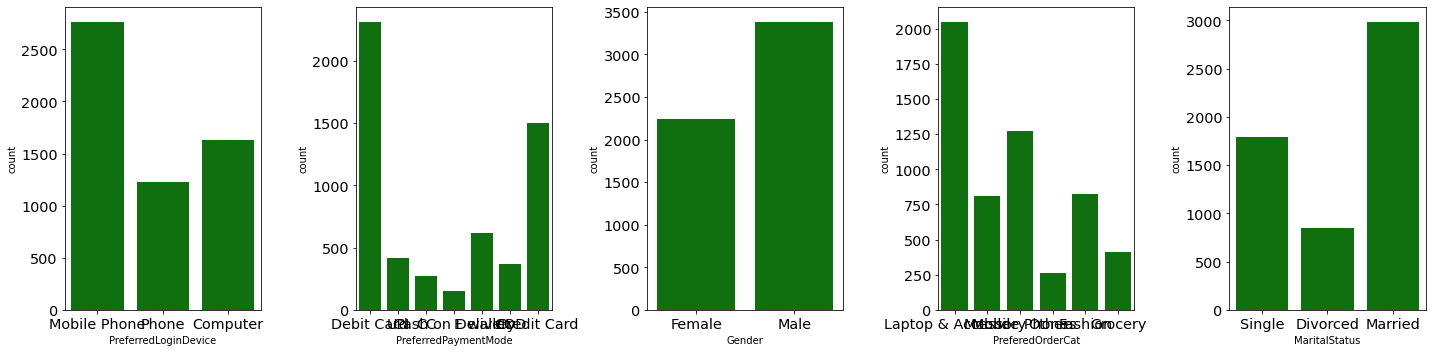

In [64]:
plt.figure(figsize=(20,5))
for i in range(0, len(cats)):
    plt.subplot(1, len(cats), i+1)
    sns.countplot(x=df[cats[i]], color ='green')
    plt.tight_layout()

Analisa : 
* Semua feature tidak memiliki sebaran yang timpang

# Multvariate Analysis

In [66]:
df.corr()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,-0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,-0.033146,0.160814,-0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,-0.019083,1.000000,-0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,-0.010058,-0.008264,-0.028697,-0.160757,-0.154118
Tenure,0.029952,-0.349408,1.000000,-0.060688,-0.018218,-0.021226,-0.023983,-0.013903,0.237666,-0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.003239,0.084703,-0.060688,1.000000,0.010624,-0.009150,0.027934,-0.011554,-0.029440,0.003375,-0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,-0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,-0.011020,0.028696,0.038795,-0.003935,0.002681,0.017829,-0.009200
HourSpendOnApp,0.598417,0.018675,-0.021226,-0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,-0.023983,0.027934,0.019071,0.316800,1.000000,-0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,-0.033146,0.105481,-0.013903,-0.011554,0.007722,0.031858,-0.017228,1.000000,0.053583,-0.031115,-0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,-0.029440,-0.011020,0.145126,0.084997,0.053583,1.000000,-0.026399,0.015533,0.042120,-0.007609,-0.064847,0.186688
Complain,-0.009944,0.250188,-0.021268,0.003375,0.028696,0.006976,0.003407,-0.031115,-0.026399,1.000000,-0.004529,-0.008174,-0.019307,-0.043546,0.000525


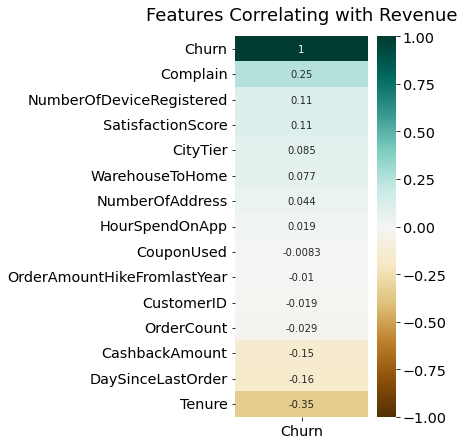

In [77]:
plt.figure(figsize=(3, 7))
heatmap = sns.heatmap(df.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Revenue', fontdict={'fontsize':18}, pad=16);

Analisa : 
* Tenure dan Churn emmiliki weak correlative relation dengan churn
* Complain dan Churn memiliki weak correlative relatin dengan churn


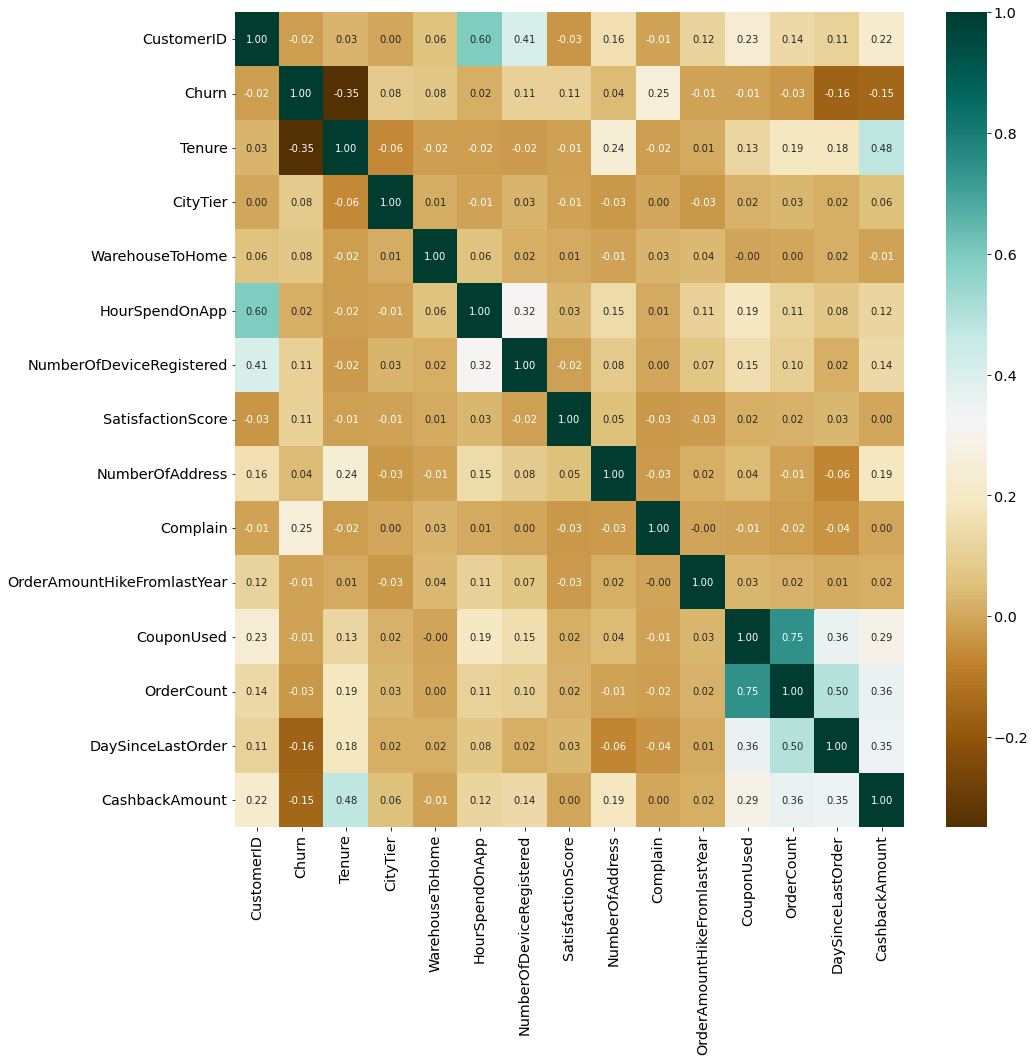

In [87]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='BrBG', annot=True, fmt='.2f')

Analisa : 
* OrderCount dengan CouponUsed memiliki strong correlation
* DaySinceOrder dengan Order Count memiliki mid correlation

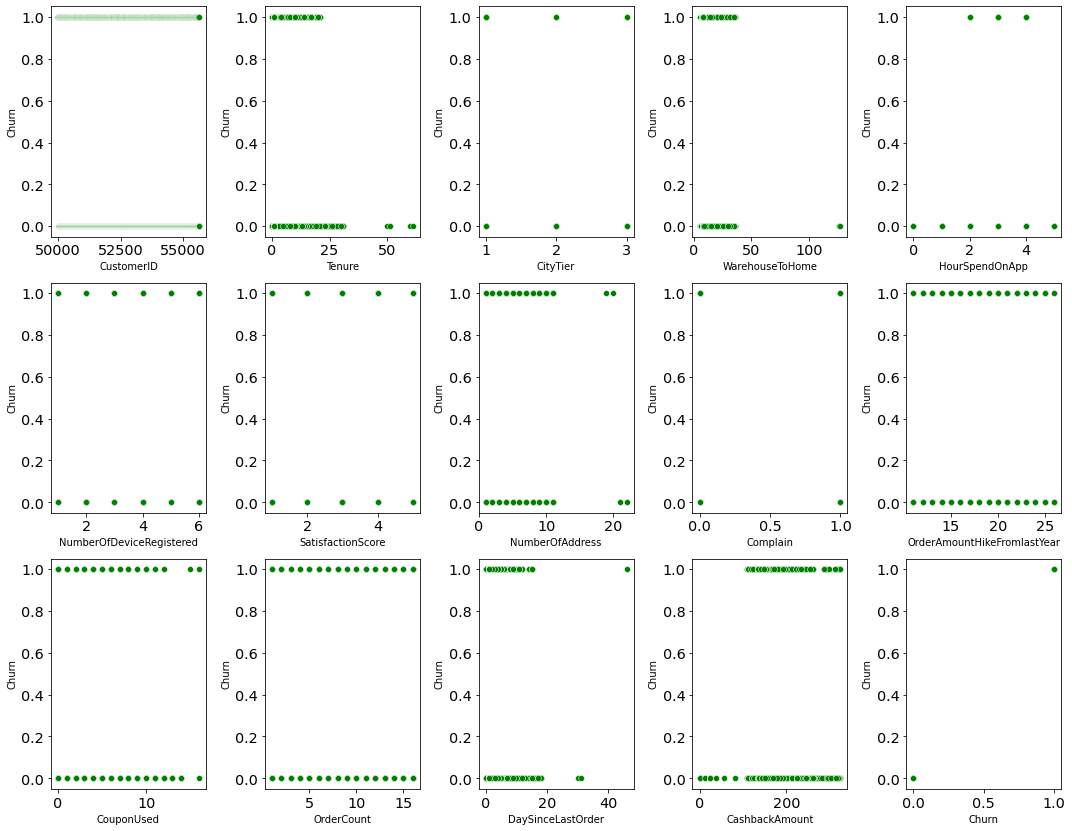

In [83]:
plt.figure(figsize=(15, 15))
for i in range(0, len(nums)):
    plt.subplot(4, len(nums)/3, i+1)
    sns.scatterplot(x=df[nums[i]], y=df['Churn'], color='green')
    plt.tight_layout()

# Business Insight

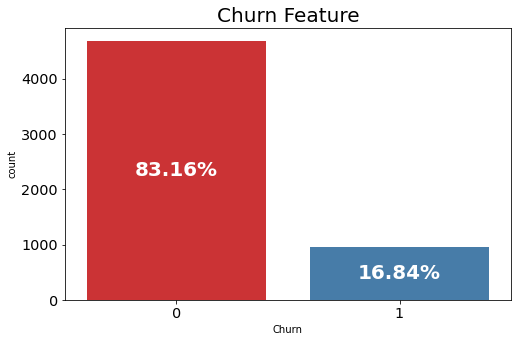

In [92]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='Churn', palette='Set1')
for i in ax.patches:
  ax.text(x=i.get_x()+i.get_width()/2,
          y=i.get_height()/2,
          s=f"{np.round(i.get_height()/len(df)*100,2)}%",
          ha="center",
          va="center",
          size=20,
          weight="bold",
          rotation="360",
          color="white")
plt.title("Churn Feature", size=20)
plt.show()

Analisa :
* Data Target (Churn) terdiri dari 83.16% yang tidak churn (Tidak Meninggalkan Platform) dan 16.84% Churn (Meninggalkan Platform)